In [1]:
using Revise

using QuantumOptics
using QuantumOpticsBase

include("TwoSidedMasterEquations.jl")
using .TwoSidedMasterEquations

using Plots

In [2]:
function QFI_BTC_TSME(Nj, Tfinal,dt,κ,ω; ρ0 = nothing , ϵ = .0005 , QFItype="joint")
        
        basis_collective = SpinBasis(Nj//2)

        if ρ0 == nothing
            ρ0 = spindown(basis_collective)
        end
        
        Jx=0.5*sigmax(basis_collective)
        Jm=0.5*sigmam(basis_collective)
        
        timespan = [0:dt:Tfinal;]

        Hl = ω*Jx
        Hr = (ω+ϵ)*Jx
        # Jvec = [ sqrt(2*κ/Natoms)*Jm];
        Jvec = [ sqrt(2*κ/Nj)*Jm];

        if QFItype == "joint"

            tt , res = master_twosided(timespan, ρ0, Hl,Hr, Jvec, Jvec,fout=calc_abstr)  
            return (time = tt , QFIjoint  = [ 8*(1-fid[1] ) / ( ϵ^2 ) for fid=res] )
        
        elseif QFItype == "field"
        
            tt , res = master_twosided(timespan, ρ0, Hl,Hr, Jvec, Jvec,fout=calc_tracenorm)  
            return (time = tt , QFIfield  = [ 8*(1-fid[1] ) / ( ϵ^2 ) for fid=res] )
        
        elseif QFItype == "both"
            
            tt , res = master_twosided(timespan, ρ0, Hl,Hr, Jvec, Jvec,fout=calc_tracenorm_and_abstr)  
            return (time = tt , QFIjoint = [ 8*(1-fid[2] ) / ( ϵ^2 ) for fid=res], QFIfield = [ 8*(1-fid[1] ) / ( ϵ^2 ) for fid=res] )
        
        else
            error("Invalid QFItype: $QFItype. Must be 'joint', 'field', or 'both'.")
        end 
        
end

QFI_BTC_TSME (generic function with 1 method)

## Time crystal phase, dynamics

In [3]:
Natoms = 10
ωval = 2.;
κval=.5; # so the dissipator is (1/sqrt(Nj))*Jm

dtval = 0.5 / (Natoms * ωval)
tfin= 30 * Natoms^2
println("dt=",dtval)
println("number of steps =",tfin/dtval)

ϵval = .0001;
# ϵval = 0.00001;

@time begin
    result = QFI_BTC_TSME(Natoms, tfin,dtval,κval,ωval ; ϵ = ϵval)
end

dt=0.025
number of steps =120000.0
  4.869404 seconds (27.19 M allocations: 1.391 GiB, 2.80% gc time, 96.21% compilation time)


(time = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225  …  2999.775, 2999.8, 2999.825, 2999.85, 2999.875, 2999.9, 2999.925, 2999.95, 2999.975, 3000.0], QFIjoint = [0.0, 0.006243539019124, 0.024948132448798788, 0.056074789256399526, 0.09958531776987911, 0.1554416151350324, 0.22360602258686413, 0.3040414142674308, 0.3967114636793667, 0.5015805548680419  …  1.823335415131e7, 1.8233509530947067e7, 1.823366491055314e7, 1.8233820290128298e7, 1.823397566967273e7, 1.8234131049186163e7, 1.823428642866878e7, 1.823444180812048e7, 1.823459718754137e7, 1.8234752566931255e7])

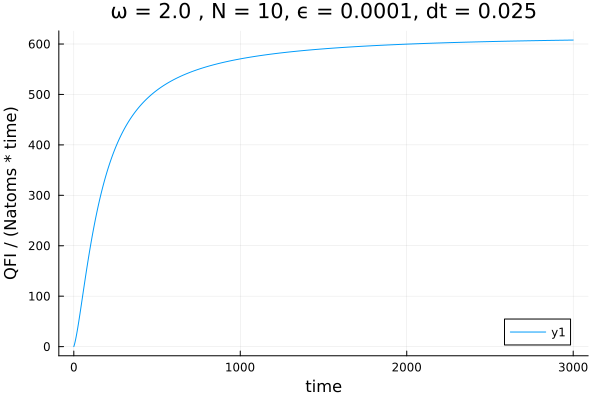

In [4]:
plot(result.time,result.QFIjoint./(Natoms*result.time))
xlabel!("time")
ylabel!("QFI / (Natoms * time)")
title!("ω = $ωval , N = $Natoms, ϵ = $ϵval, dt = $dtval")

In [5]:
result.QFIjoint[end] / result.time[end]

6078.2508556437515

In [19]:
Natoms = 20
ωval = 2.;
κval=.5; # so the dissipator is (1/sqrt(Nj))*Jm

dtval = 0.5 / (Natoms * ωval)
tfin= 30 * Natoms^2
println("dt=",dtval)
println("number of steps =",tfin/dtval)

ϵval = .0001;
# ϵval = 0.00001;

@time begin
    result = QFI_BTC_TSME(Natoms, tfin,dtval,κval,ωval ; ϵ = ϵval)
end

dt=0.0125
number of steps =960000.0
  4.910225 seconds (338 allocations: 64.635 MiB, 3.04% gc time)


(time = [0.0, 0.0125, 0.025, 0.0375, 0.05, 0.0625, 0.075, 0.0875, 0.1, 0.1125  …  11999.8875, 11999.9, 11999.9125, 11999.925, 11999.9375, 11999.95, 11999.9625, 11999.975, 11999.9875, 12000.0], QFIjoint = [0.0, 0.0031233682307174604, 0.01248698922040603, 0.02808118182429098, 0.049896176079755605, 0.07792211320634124, 0.11214966733064102, 0.15256906849003826, 0.1991709908111261, 0.2519454866956039  …  3.996525063616353e8, 3.9965280014017653e8, 3.996530939185024e8, 3.996533876966125e8, 3.996536814745071e8, 3.996539752521862e8, 3.996542690296495e8, 3.9965456280689746e8, 3.996548565839297e8, 3.9965515036074644e8])

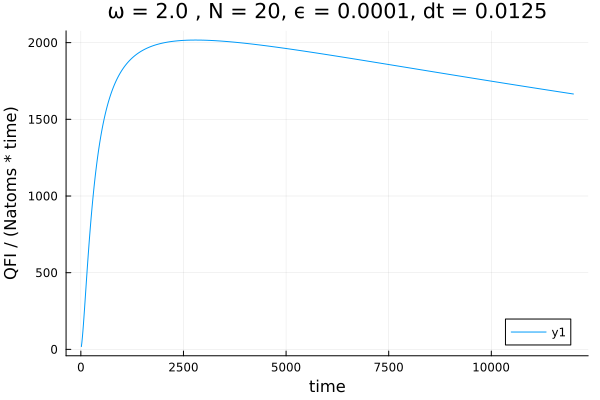

In [21]:
Δn_plot = 1000
plot(result.time[1:Δn_plot:end], result.QFIjoint[1:Δn_plot:end] ./ (Natoms * result.time[1:Δn_plot:end]))
xlabel!("time")
ylabel!("QFI / (Natoms * time)")
title!("ω = $ωval , N = $Natoms, ϵ = $ϵval, dt = $dtval")

Notice that you have to reduce ε in the numerical derivative!

In [25]:
Natoms = 20
ωval = 2.;
κval = 0.5; # so the dissipator is (1/sqrt(Nj))*Jm

dtval = 0.5 / (Natoms * ωval)
tfin = 30 * Natoms^2
println("dt=", dtval)
println("number of steps =", tfin / dtval)

ϵval = 0.00001;
# ϵval = 0.00001;

@time begin
    result = QFI_BTC_TSME(Natoms, tfin, dtval, κval, ωval; ϵ=ϵval)
end

dt=0.0125
number of steps =960000.0
  4.793467 seconds (338 allocations: 64.635 MiB, 0.73% gc time)


(time = [0.0, 0.0125, 0.025, 0.0375, 0.05, 0.0625, 0.075, 0.0875, 0.1, 0.1125  …  11999.8875, 11999.9, 11999.9125, 11999.925, 11999.9375, 11999.95, 11999.9625, 11999.975, 11999.9875, 12000.0], QFIjoint = [0.0, 0.003117506253147439, 0.012487788580983759, 0.028084201630917956, 0.04989786361875303, 0.07792877454448897, 0.1121591708397318, 0.15257128893608748, 0.19917401061775306, 0.25194957231633447  …  5.482368827855487e8, 5.482374618280338e8, 5.482380408705189e8, 5.482386199130039e8, 5.482391989554801e8, 5.482397779979563e8, 5.482403570404236e8, 5.48240936082882e8, 5.482415151253582e8, 5.482420941677989e8])

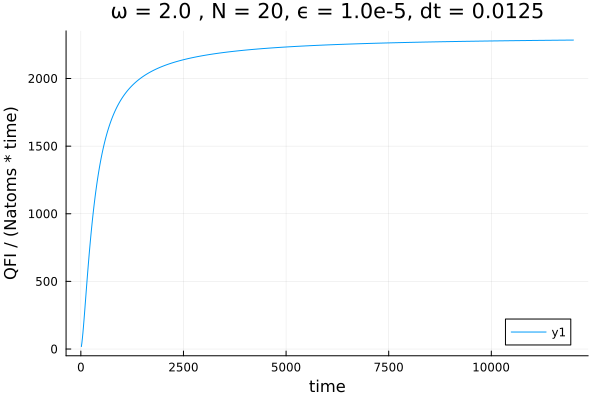

In [26]:
Δn_plot = 1000
plot(result.time[1:Δn_plot:end], result.QFIjoint[1:Δn_plot:end] ./ (Natoms * result.time[1:Δn_plot:end]))
xlabel!("time")
ylabel!("QFI / (Natoms * time)")
title!("ω = $ωval , N = $Natoms, ϵ = $ϵval, dt = $dtval")

In [28]:
result.QFIjoint[end] / result.time[end]

45686.841180649906

In [39]:
Natoms = 50
ωval = 2.;
κval = 0.5; # so the dissipator is (1/sqrt(Nj))*Jm

dtval = 0.5 / (Natoms * ωval)
tfin = 20 * Natoms^2
println("dt=", dtval)
println("number of steps =", tfin / dtval)

ϵval = 0.000001;
# ϵval = 0.00001;

@time begin
    result = QFI_BTC_TSME(Natoms, tfin, dtval, κval, ωval; ϵ=ϵval)
end

dt=0.005
number of steps =1.0e7


┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /Users/francescoalbarelli/.julia/packages/SciMLBase/tey0W/src/integrator_interface.jl:586


146.835112 seconds (423 allocations: 558.468 MiB, 0.07% gc time)


(time = [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045  …  24804.145, 24804.15, 24804.155, 24804.16, 24804.165, 24804.17, 24804.175, 24804.18, 24804.185, 24804.19], QFIjoint = [0.0, 0.0008881784197001252, 0.004440892098500626, 0.011546319456101628, 0.019539925233402755, 0.031086244689504383, 0.04440892098500626, 0.060396132539608516, 0.07904787935331115, 0.10036416142611415  …  1.6716803198511877e10, 1.671680663744901e10, 1.671681007638437e10, 1.6716813515325058e10, 1.6716816954262194e10, 1.671682039319844e10, 1.6716823832138239e10, 1.671682727107271e10, 1.6716830710010733e10, 1.6716834148949644e10])

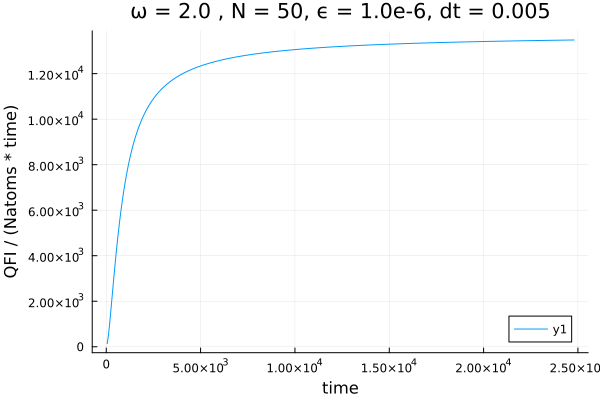

In [40]:
Δn_plot = 10000
plot(result.time[1:Δn_plot:end], result.QFIjoint[1:Δn_plot:end] ./ (Natoms * result.time[1:Δn_plot:end]))
xlabel!("time")
ylabel!("QFI / (Natoms * time)")
title!("ω = $ωval , N = $Natoms, ϵ = $ϵval, dt = $dtval")

## N scaling

In [6]:
ωval = 2.;
κval = 0.5; # so the dissipator is (1/sqrt(Nj))*Jm

Nvec = 10:10:50

QFIasymp_ω2 = []

for Nj in Nvec

    # these seem resonable, given the cursory analysis of the dynamics above
    dtval = 0.5 / (Nj * ωval) 
    tfin = 20 * Nj^2
    
    println("dt=", dtval)
    println("number of steps =", tfin / dtval)

    ϵval = 0.000001
    # ϵval = 0.00001;

    result = QFI_BTC_TSME(Nj, tfin, dtval, κval, ωval; ϵ=ϵval)

    push!(QFIasymp_ω2, result.QFIjoint[end] / result.time[end] )

end

dt=0.025
number of steps =80000.0
dt=0.0125
number of steps =640000.0
dt=0.008333333333333333
number of steps =2.16e6
dt=0.00625
number of steps =5.12e6


┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /Users/francescoalbarelli/.julia/packages/SciMLBase/tey0W/src/integrator_interface.jl:586


dt=0.005
number of steps =1.0e7


┌ Warning: Interrupted. Larger maxiters is needed. If you are using an integrator for non-stiff ODEs or an automatic switching algorithm (the default), you may want to consider using a method for stiff equations. See the solver pages for more details (e.g. https://docs.sciml.ai/DiffEqDocs/stable/solvers/ode_solve/#Stiff-Problems).
└ @ SciMLBase /Users/francescoalbarelli/.julia/packages/SciMLBase/tey0W/src/integrator_interface.jl:586


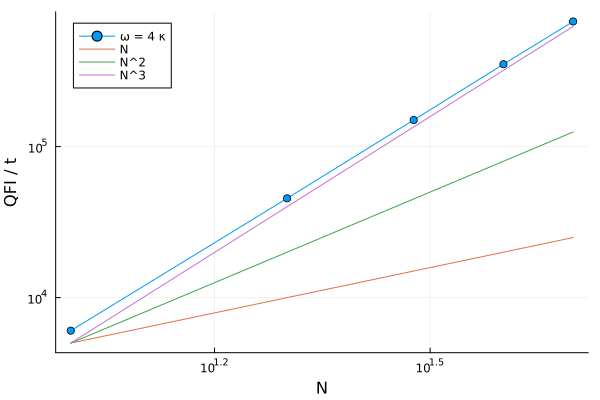

In [21]:
plot(Nvec, QFIasymp_ω2, marker=:circle, xaxis=:log, yaxis=:log, label="ω = 4 κ", legend=:topleft)
# plot!(Nvec, real(QFIasymp_ω1), marker=:star, xaxis=:log, yaxis=:log, label="ω = 1 κ")
plot!(Nvec, 0.5*1000 .* Nvec, xaxis=:log, yaxis=:log, label="N")
plot!(Nvec, 0.5*100 .* Nvec.^ 2, xaxis=:log, yaxis=:log, label="N^2")
plot!(Nvec, 0.5*10 .* Nvec .^ 3, xaxis=:log, yaxis=:log, label="N^3")
xlabel!("N")
ylabel!("QFI / t")